<a href="https://colab.research.google.com/github/DitaAnatasya/google_colab/blob/main/Decision_Tree_Dita_Anatasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import fungsi train_test_split
from sklearn import metrics #Import scikit-learn metrics module untuk perhitungan akurasi

**PREPROCESSING**

In [ ]:
col_names = ['Date', 'Product', 'Sales Count', 'Visits Count']
df = pd.read_csv("data.csv", header=None, names=col_names, skiprows=1)
print(df) # melihat data frame

           Date    Product  Sales Count  Visits Count
0    31.01.2020  Product A          135          2420
1    29.02.2020  Product A          153          2502
2    31.03.2020  Product A          162          1074
3    30.04.2020  Product A          162             0
4    31.05.2020  Product A          128             0
..          ...        ...          ...           ...
110  31.07.2021  Product E        59336          3555
111  31.08.2021  Product E        68809          4767
112  30.09.2021  Product E       110873          7917
113  31.10.2021  Product E       101955          7496
114  30.11.2021  Product E       125646          9601

[115 rows x 4 columns]


In [ ]:
df.head(10)

,Date,Product,Sales Count,Visits Count
0,31.01.2020,Product A,135,2420
1,29.02.2020,Product A,153,2502
2,31.03.2020,Product A,162,1074
3,30.04.2020,Product A,162,0
4,31.05.2020,Product A,128,0
5,30.06.2020,Product A,140,526
6,31.07.2020,Product A,143,935
7,31.08.2020,Product A,162,795
8,30.09.2020,Product A,242,2290
9,31.10.2020,Product A,220,2460


In [ ]:
df.tail(10)

,Date,Product,Sales Count,Visits Count
105,28.02.2021,Product E,85608,4397
106,31.03.2021,Product E,82309,6201
107,30.04.2021,Product E,68739,6802
108,31.05.2021,Product E,52438,3110
109,30.06.2021,Product E,80986,8333
110,31.07.2021,Product E,59336,3555
111,31.08.2021,Product E,68809,4767
112,30.09.2021,Product E,110873,7917
113,31.10.2021,Product E,101955,7496
114,30.11.2021,Product E,125646,9601


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          115 non-null    object
 1   Product       115 non-null    object
 2   Sales Count   115 non-null    int64 
 3   Visits Count  115 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.7+ KB


In [ ]:
#mengubah bentuk str ke int
df["Product"].replace({'Product A': 1, 'Product B': 2, 'Product C' : 3, 'Product D' : 4, 'Product E' : 5}, inplace = True)

**FEATURE SELECTION**

In [ ]:
feature_cols = ['Sales Count', 'Visits Count']
x = df[feature_cols]
y = df.Product

**SPLITTING DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
print(y_train)

103    5
19     1
114    5
27     2
36     2
      ..
9      1
72     4
12     1
107    5
37     2
Name: Product, Length: 80, dtype: int64


**BUILDING DECISION TREE**

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

**EVALUATING MODEL**

In [ ]:
print("Akurasi: ", metrics.accuracy_score(y_test, y_pred))

Akurasi:  0.9714285714285714


**VISUALISASI MODEL**

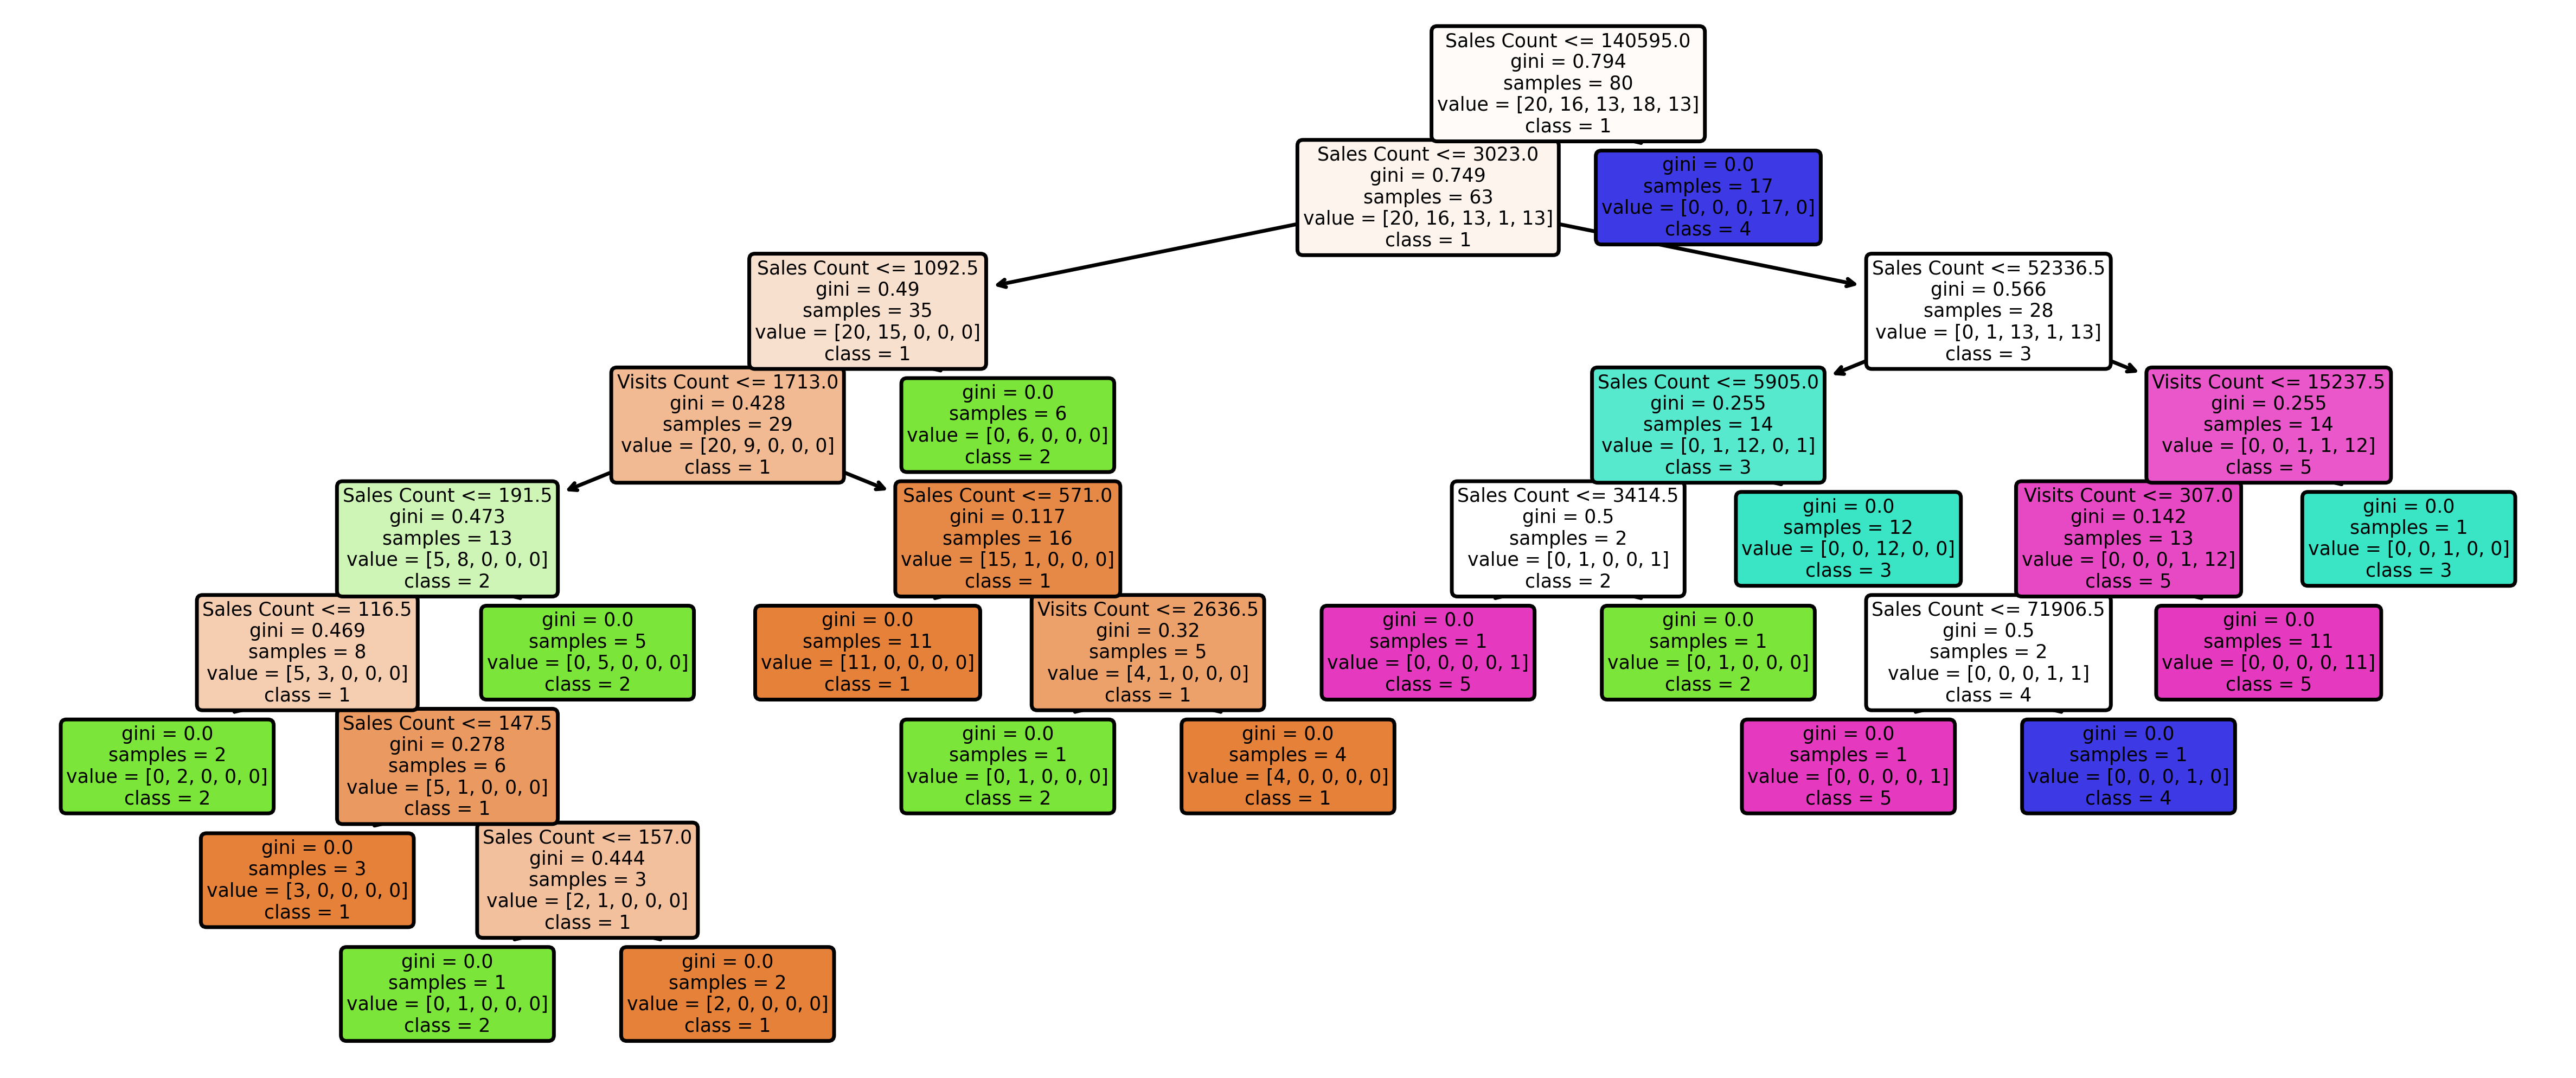

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["1", "2", "3", "4", "5"],
               filled=True,
               rounded=True
               );